## Mean precipitation - pr

In [92]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import seaborn as sns

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [93]:
import os
import sys
home = os.path.expanduser("~") + '/Documents'
sys.path.insert(0, '{}/phd/functions'.format(home))
from myFuncs import *

### one dataset

In [97]:
variable = 'precip'

models_cmip5 = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

models_cmip6 =[
    # 'TaiESM1',        # 1 rcp monthly
    # 'BCC-CSM2-MR',    # 2 rcp monthly   
    # 'FGOALS-g3',      # 3 rcp 0463 - 0614
    # 'CNRM-CM6-1',     # 4 rcp 1850 - 1999
    # 'MIROC6',         # 5 rcp 3200 - 3340
    # 'MPI-ESM1-2-HR',  # 6 rcp 1850 - 2014
    # 'NorESM2-MM',     # 7 rcp 0001 - 0141
    'GFDL-CM4',       # 8 rcp 0001 - 0141 (gr2)
    # 'CanESM5',        # 9 rcp 1850 - 2000
    # 'CMCC-ESM2',      # 10 rcp monthly
    # 'UKESM1-0-LL',    # 11 rcp 1850 - 1999
    # 'MRI-ESM2-0',     # 12 rcp 1850 - 2000
    # 'CESM2',          # 13 rcp 0001 - 0990  (multiple fill values (check if all get converted to NaN), for historical)
    # 'NESM3',          # 14 rcp 1850 - 2014
        ]

observations = [
    # 'GPCP'
    ]

datasets = models_cmip5 + models_cmip6 + observations

resolutions = [
    'orig',
    # 'regridded'
    ]

experiments =[
    # 'historical',
    # 'rcp85',
    'abrupt-4xCO2'
    ]

print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])
ds

variable:precip, dataset:GFDL-CM4, experiment:abrupt-4xCO2, resolution:orig


<xarray.Dataset>
Dimensions:  (lat: 36, lon: 144, time: 25550)
Coordinates:
  * lat      (lat) float64 -35.0 -33.0 -31.0 -29.0 -27.0 ... 29.0 31.0 33.0 35.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) object 0001-01-01 12:00:00 ... 0070-12-31 12:00:00
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               day
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    ...                     ...
    variable_id:            pr
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1
    branch_time_in_parent:  36500.0
    parent_time_units:      days since 0001-1-1

In [95]:
data = ds[variable]
data

<xarray.DataArray 'precip' (time: 10950, lat: 36, lon: 144)>
[56764800 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -35.0 -33.0 -31.0 -29.0 -27.0 ... 29.0 31.0 33.0 35.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Attributes:
    units:    mm day⁻¹

In [87]:
has_nan = np.isnan(data).any()
print('characteristics')
print('hasNaN:', has_nan.data)
print('max', data.max().data)
print('min', data.min().data)
print('mean', data.mean().data)

characteristics
hasNaN: False
max 256.597900390625
min 1.0886075569628562e-13
mean 3.2427642


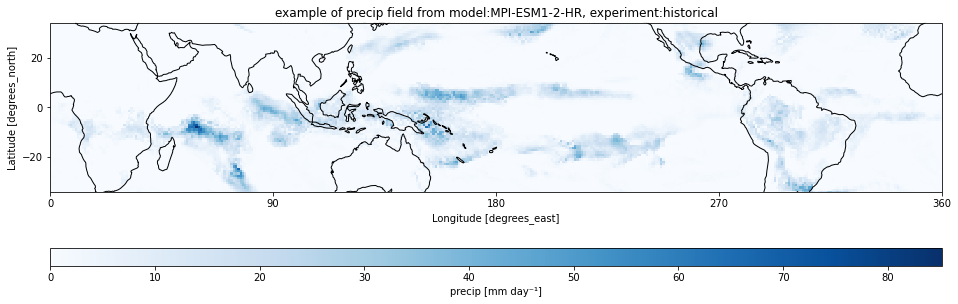

In [88]:
scene = data.isel(time=0)
title = 'example of {} field from model:{}, experiment:{}'.format(variable, datasets[0], experiments[0])
cmap = 'Blues'
plot_scene(scene, cmap=cmap, title = title)

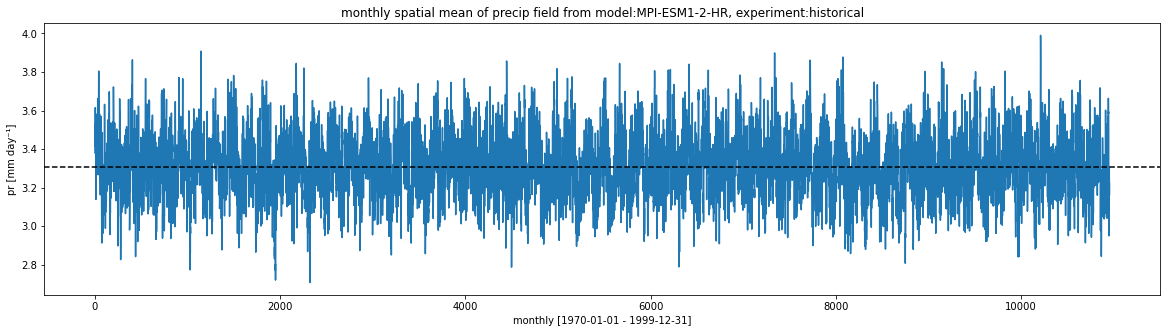

In [89]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

aWeights = np.cos(np.deg2rad(data.lat))
y= data.weighted(aWeights).mean(dim=('lat','lon'))
title = '{} spatial mean of {} field from model:{}, experiment:{}'.format(timeMean_options[0], variable, datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
ylabel = 'pr [{}]'.format(data.units)


plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

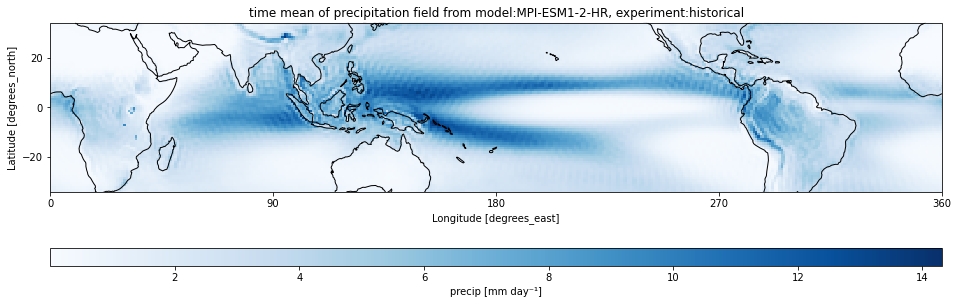

In [90]:
title = 'time mean of precipitation field from model:{}, experiment:{}'.format(datasets[0], experiments[0])
plot_scene(data.mean(dim='time', keep_attrs=True), cmap='Blues', title = title)

In [91]:
aWeights = np.cos(np.deg2rad(data.lat))
data.mean(dim='time', keep_attrs=True).weighted(aWeights).mean(dim=('lat','lon'), keep_attrs=True)

<xarray.DataArray 'precip' ()>
array(3.3086208)
Attributes:
    units:    mm day⁻¹

In [57]:
# run all above from this cell

### comparing datasets

In [58]:
variable = 'precip'

models_cmip5 = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

models_cmip6 =[
    'TaiESM1',        # 1 # rcp monthly
    'BCC-CSM2-MR',    # 2 # rcp monthly   
    'FGOALS-g3',      # 3 # rcp 0463 - 0614
    'CNRM-CM6-1',     # 4 # rcp 1850-1999
    'MIROC6',         # 5 # rcp 3200 - 3340
    'MPI-ESM1-2-HR',  # 6 # rcp 1850 - 2014
    'NorESM2-MM',     # 7 # rcp 0001 - 0141
    'GFDL-CM4',       # 8 # rcp 0001 - 0141 (gr2)
    'CanESM5',        # 9 # rcp 1850 - 2000
    'CMCC-ESM2',      # 10 # rcp monthly
    'UKESM1-0-LL',    # 11 # rcp 1850 - 1999
    'MRI-ESM2-0',     # 12 # rcp 1850 - 2000
    'CESM2',          # 13 # rcp 0001 - 0990  (multiple fill values (check if all get converted to NaN), for historical)
    'NESM3',          # 12 # rcp 1850-2014
        ]

observations = [
    # 'GPCP'
    ]

datasets = models_cmip5 + models_cmip6 + observations

resolutions = [
    'orig',
    # 'regridded'
    ]

experiments =[
    'historical',
    # 'rcp85',
    # 'abrupt-4xCO2'
    ]

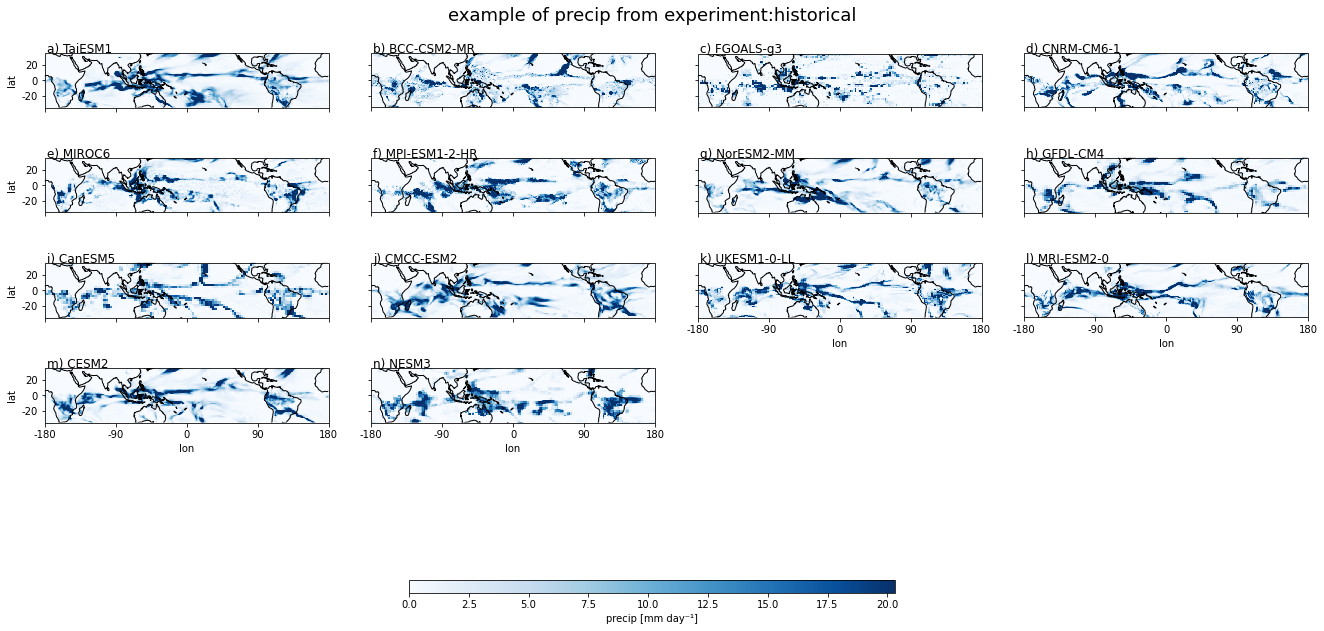

In [59]:
common_limit = True
quantile_low = 0
quantile_high = 0.95
if common_limit:
    vmin, vmax = [], []
    for dataset in datasets:
        data = get_dsvariable(variable, dataset, experiments[0], home, resolutions[0])[variable].isel(time=0)
        y= data
        
        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)
else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'example of {} from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)
for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    data = get_dsvariable(variable, dataset, experiments[0], home, resolutions[0])[variable].isel(time=0)
    y = data

    cmap = 'Blues'
    pcm = plot_scene(y, cmap=cmap, ax=ax, vmin=vmin, vmax=vmax)

    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)

cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('precip', y.units))

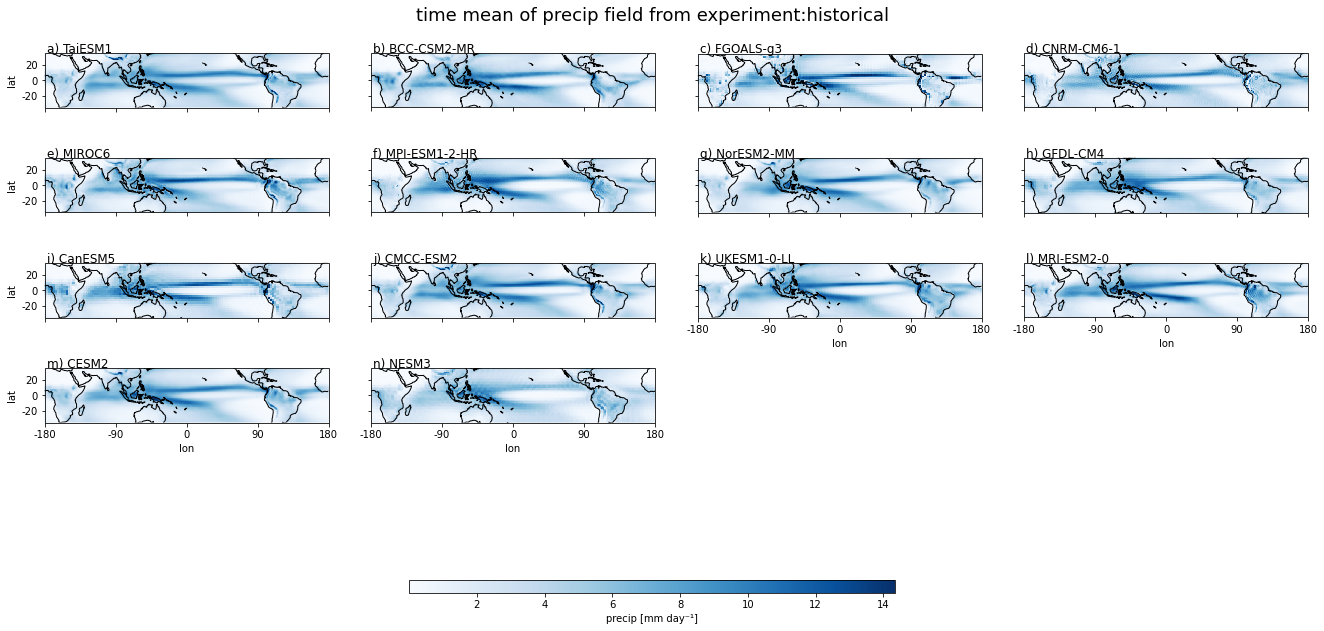

In [60]:
common_limit = True
quantile_low = 0
quantile_high = 0.99
if common_limit:
    vmin, vmax = [], []
    for dataset in datasets:
        data = get_dsvariable(variable, dataset, experiments[0], home, resolutions[0])[variable]
        y = data.mean(dim='time')

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)
else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'time mean of {} field from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    data = get_dsvariable(variable, dataset, experiments[0], home, resolutions[0])[variable]
    y = data.mean(dim='time', keep_attrs=True)

    cmap = 'Blues'
    pcm = plot_scene(y, cmap=cmap, ax=ax, vmin=vmin, vmax=vmax)

    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)

cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format(variable, y.units))


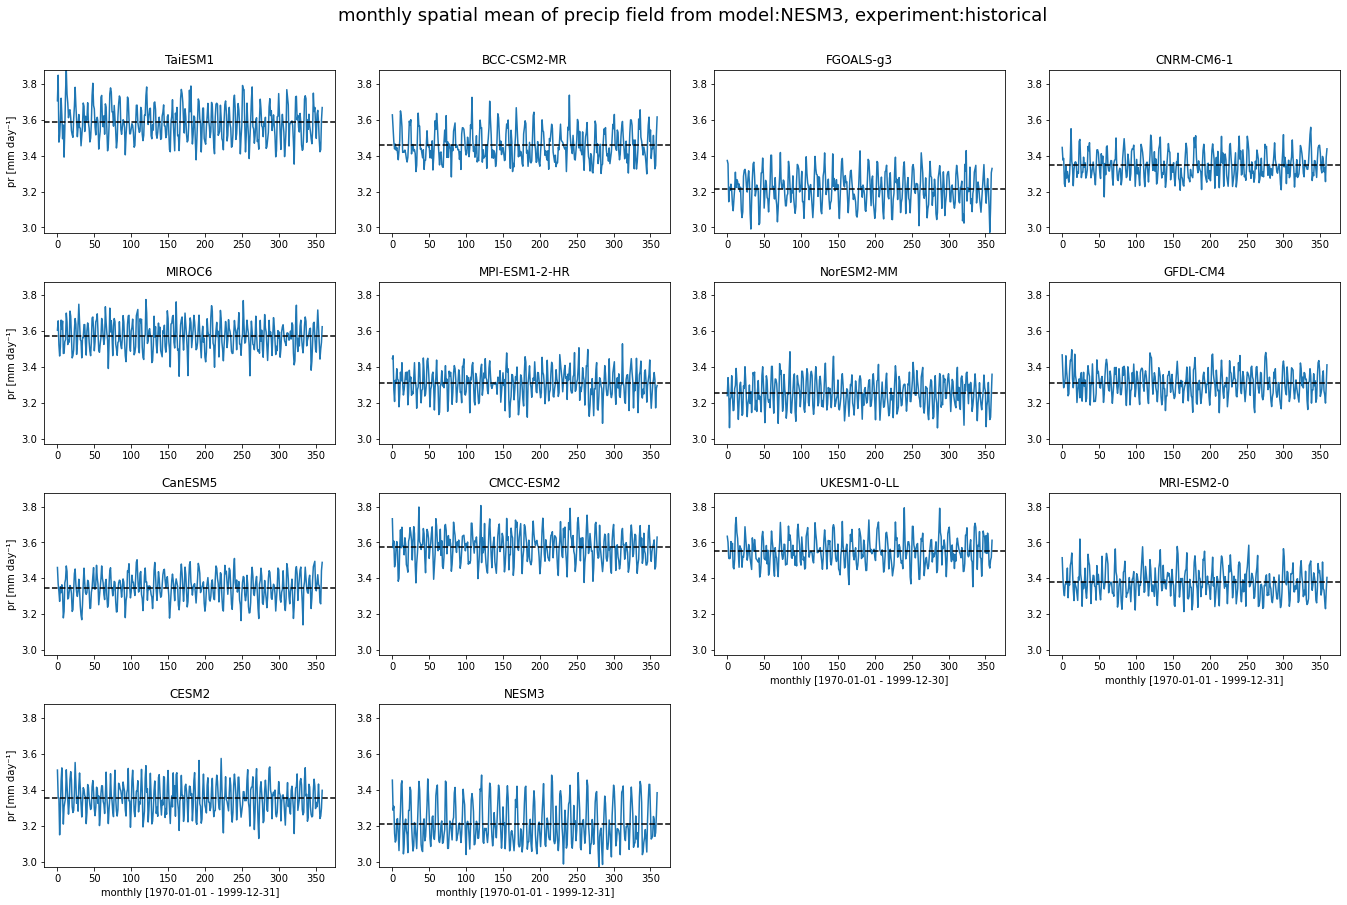

In [61]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

common_limit = True
quantile_low = 0
quantile_high = 1
if common_limit:
    vmin, vmax = [], []
    for dataset in datasets:
        data = get_dsvariable(variable, dataset, experiments[0], home, resolutions[0])[variable]
        aWeights = np.cos(np.deg2rad(data.lat))
        y = data.weighted(aWeights).mean(dim=('lat','lon'))
        y = resample_timeMean(y, timeMean_options[0])

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)
else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} spatial mean of {} field from model:{}, experiment:{}'.format(timeMean_options[0], variable, dataset, experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)
for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)

    data = get_dsvariable(variable, dataset, experiments[0], home, resolutions[0])[variable]
    aWeights = np.cos(np.deg2rad(data.lat))
    y= data.weighted(aWeights).mean(dim=('lat','lon'))
    y = resample_timeMean(y, timeMean_options[0])

    title = dataset
    plot_timeseries(y, title=title, timeMean_option=timeMean_options, ax=ax, ymin=vmin, ymax=vmax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
        plt.xlabel(xlabel)

        if timeMean_options[0]=='seasonal':
            plt.legend()

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'pr [{}]'.format(data.units)
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

Text(0, 0.5, 'precip [mm day⁻¹]')

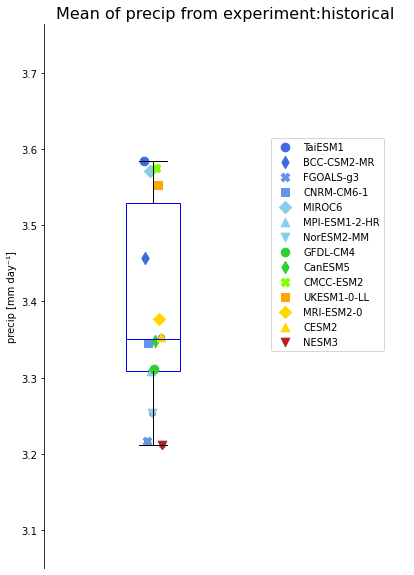

In [63]:
labels_cmip5 =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC',     # 19
    ]

labels_cmip6 = [
    'TaiESM1',        # 1
    'BCC-CSM2-MR',    # 2
    'FGOALS-g3',      # 3
    'CNRM-CM6-1',     # 4
    'MIROC6',         # 5
    'MPI-ESM1-2-HR',  # 6
    'NorESM2-MM',     # 7
    'GFDL-CM4',       # 8
    'CanESM5',        # 9
    'CMCC-ESM2',      # 10
    'UKESM1-0-LL',    # 11
    'MRI-ESM2-0',     # 12
    'CESM2',          # 13
    'NESM3'           # 14
    ]

labels_obs = [
    'GPCP'          # 1
    ]

labels = labels_cmip5 + labels_cmip6 + labels_obs

colors = [
    'red', 'red', 'red', 'crimson', 'crimson', 'firebrick', 'firebrick', # red
    'gold', 'gold', 'orange', # yellow
    'chartreuse', 'limegreen', 'limegreen', # green
    'skyblue', 'skyblue', 'skyblue', 'cornflowerblue', 'cornflowerblue', 'royalblue', 'royalblue' # blue
    ]
markers = ['o','d','X','s','D', '^','v']


order_by_tas = False
if order_by_tas:
    order_list = []
    for dataset in datasets:
        if dataset == 'GPCP':
            order_list = np.append(order_list, 0)
        else:
            data = get_metric('tas_tMean', dataset, experiments[0], home, resolutions[0])['tas_tMean']
            aWeights = np.cos(np.deg2rad(data.lat))
            tas = data.weighted(aWeights).mean(dim=('lat','lon'))
            order_list = np.append(order_list, tas)
    order = np.argsort(order_list)[::-1]
else:
    order = np.arange(len(datasets), dtype=int)
    colors.reverse()


common_limit = True
quantile_low = 0
quantile_high = 1
if common_limit:
    vmin, vmax  = [], []
    for dataset in datasets:
        data = get_dsvariable(variable, dataset, experiments[0], home, resolutions[0])[variable]
        aWeights = np.cos(np.deg2rad(data.lat))
        y = data.weighted(aWeights).mean(dim=('time','lat','lon'))

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)
else:
    vmin, vmax = None, None 


plt.figure(figsize=(6.5,10))
title = 'Mean of {} from experiment:{}'.format(variable, experiments[0])
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:
    data = get_dsvariable(variable, dataset, experiments[0], home, resolutions[0])[variable]
    aWeights = np.cos(np.deg2rad(data.lat))
    y_data = data.weighted(aWeights).mean(dim=('time','lat','lon'))
    y = np.append(y, y_data)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))
x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()
    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    plt.legend(bbox_to_anchor=(0.95,0.8))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('precip [{}]'.format('mm day' + chr(0x207B)+ chr(0x00B9)))

### Comparing datasets in a warmer climate

In [73]:
variable = 'precip'

models_cmip5 = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

models_cmip6 =[
    # 'TaiESM1',        # 1 # rcp monthly
    # 'BCC-CSM2-MR',    # 2 # rcp monthly   
    'FGOALS-g3',      # 3 # rcp 0463 - 0614
    'CNRM-CM6-1',     # 4 # rcp 1850-1999
    'MIROC6',         # 5 # rcp 3200 - 3340
    'MPI-ESM1-2-HR',  # 6 # rcp 1850 - 2014
    'NorESM2-MM',     # 7 # rcp 0001 - 0141
    'GFDL-CM4',       # 8 # rcp 0001 - 0141 (gr2)
    # 'CanESM5',        # 9 # rcp 1850 - 2000
    # 'CMCC-ESM2',      # 10 # rcp monthly
    'UKESM1-0-LL',    # 11 # rcp 1850 - 1999
    'MRI-ESM2-0',     # 12 # rcp 1850 - 2000
    'CESM2',          # 13 # rcp 0001 - 0990  (multiple fill values (check if all get converted to NaN), for historical)
    # 'NESM3',          # 12 # rcp 1850-2014
        ]

datasets = models_cmip5 + models_cmip6

resolutions = [
    'orig',
    # 'regridded'
    ]

FGOALS-g3
CNRM-CM6-1
MIROC6


/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


MPI-ESM1-2-HR
NorESM2-MM
GFDL-CM4
UKESM1-0-LL
MRI-ESM2-0
CESM2


/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


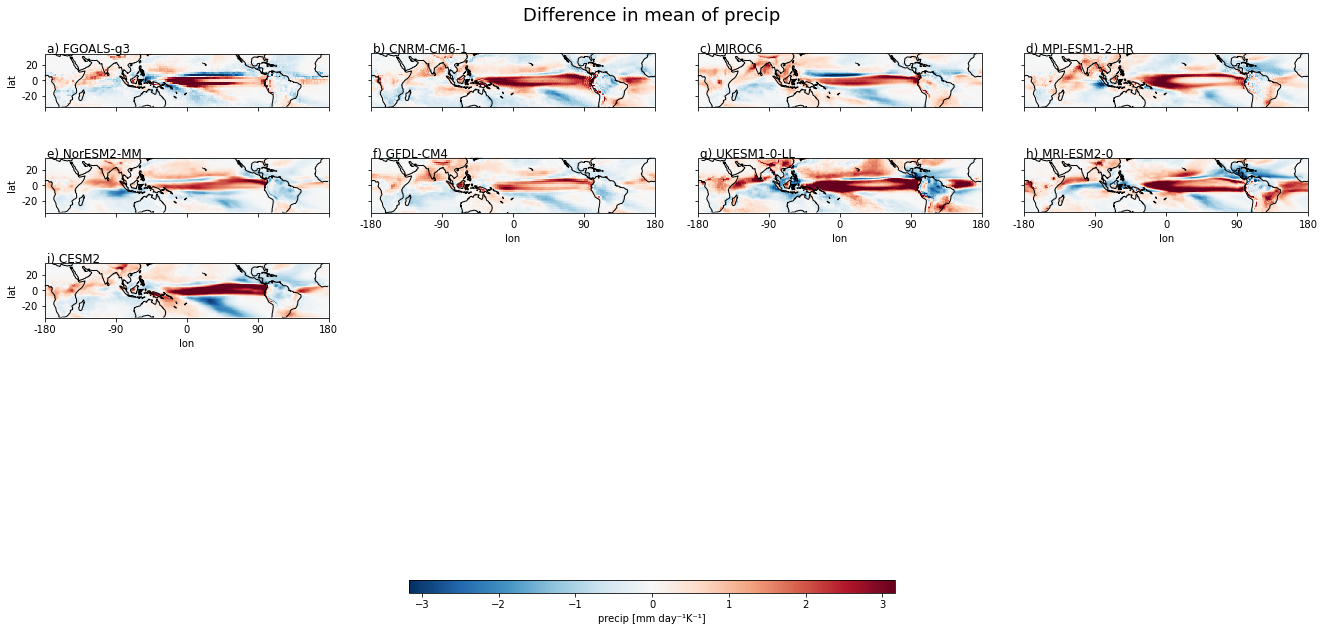

In [74]:
common_limit = True
quantile_low = 0
quantile_high = 0.95
if common_limit:
    vmin, vmax = [], []
    for dataset in datasets:
        
        if dataset == 'GPCP':
            continue
        
        data_historical = get_dsvariable(variable, dataset, experiment='historical', resolution=resolutions[0])[variable].mean(dim='time')
        if np.isin(models_cmip5, dataset).any():
            data_rcp = get_dsvariable(variable, dataset, experiment='rcp85', resolution=resolutions[0])[variable].mean(dim='time')
        elif np.isin(models_cmip6, dataset).any():
            data_rcp = get_dsvariable(variable, dataset, experiment='abrupt-4xCO2', resolution=resolutions[0])[variable].mean(dim='time')
        
        aWeights = np.cos(np.deg2rad(data_historical.lat))
        datadiff = data_rcp - data_historical
        # datadiff = (datadiff/data_historical)*100

        # tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical', resolution=resolutions[0])['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        # tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85', resolution=resolutions[0])['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        # tasdiff = tas_rcp85 - tas_historical
        # datadiff = datadiff/tasdiff

        y= datadiff

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)
else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'Difference in mean of {}'.format(variable)

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)
for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    if dataset == 'GPCP':
        ax.remove()
        continue

    data_historical = get_dsvariable(variable, dataset, experiment='historical', resolution=resolutions[0])[variable].mean(dim='time')

    if np.isin(models_cmip5, dataset).any():
        data_rcp = get_dsvariable(variable, dataset, experiment='rcp85', resolution=resolutions[0])[variable].mean(dim='time')
    elif np.isin(models_cmip6, dataset).any():
        data_rcp = get_dsvariable(variable, dataset, experiment='abrupt-4xCO2', resolution=resolutions[0])[variable].mean(dim='time')
    
    aWeights = np.cos(np.deg2rad(data_historical.lat))
    datadiff = data_rcp - data_historical
    # datadiff = (datadiff/data_historical)*100

    # tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical', resolution=resolutions[0])['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    # tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85', resolution=resolutions[0])['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    # tasdiff = tas_rcp85 - tas_historical
    # datadiff = datadiff/tasdiff
    y= datadiff

    cmap = 'RdBu_r'
    pcm = plot_scene(y, cmap=cmap, ax=ax, vmin=-vmax, vmax=vmax)

    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)

cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('precip', 'mm day' + chr(0x207B)+ chr(0x00B9) + 'K'+ chr(0x207B) + chr(0x00B9) )) # %

/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/opt/anaconda3/lib/python3.9/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/opt/anaconda3/lib/python3.9/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unabl

Text(0, 0.5, 'precip [mm day⁻¹K⁻¹]')

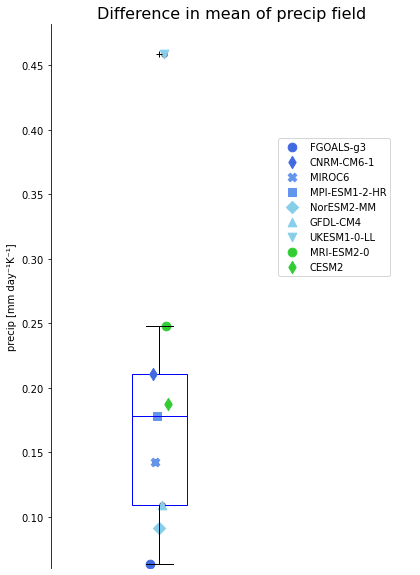

In [76]:
labels_cmip5 =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

labels_cmip6 = [
    'TaiESM1',        # 1
    'BCC-CSM2-MR',    # 2
    'FGOALS-g3',      # 3
    'CNRM-CM6-1',     # 4
    'MIROC6',         # 5
    'MPI-ESM1-2-HR',  # 6
    'NorESM2-MM',     # 7
    'GFDL-CM4',       # 8
    'CanESM5',        # 9
    'CMCC-ESM2',      # 10
    'UKESM1-0-LL',    # 11
    'MRI-ESM2-0',     # 12
    'CESM2',          # 13
    'NESM3'           # 14
    ]

labels = labels_cmip5 + labels_cmip6


colors = [
    'red', 'red', 'red', 'crimson', 'crimson', 'firebrick', 'firebrick', # red
    'gold', 'gold', 'orange', # yellow
    'chartreuse', 'limegreen', 'limegreen', # green
    'skyblue', 'skyblue', 'skyblue', 'cornflowerblue', 'cornflowerblue', 'royalblue', 'royalblue' # blue
    ]
markers = ['o','d','X','s','D', '^','v']


order_by_tasdiff = False
if order_by_tasdiff:
    order_list = []
    for dataset in datasets:

        if dataset == 'GPCP':
            order_list = np.append(order_list, 0)
        else:
            tas_historical = get_metric('tas_tMean', dataset, experiment='historical', resolution=resolutions[0])['tas_tMean']
            aWeights = np.cos(np.deg2rad(tas_historical.lat))

            tas_historical = get_metric('tas_tMean', dataset, experiment='historical', resolution=resolutions[0])['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
            if np.isin(models_cmip5, dataset).any():
                tas_rcp = get_metric('tas_tMean', dataset, experiment='rcp85')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
            elif np.isin(models_cmip6, dataset).any():
                tas_rcp = get_metric('tas_tMean', dataset, experiment='abrupt-4xCO2')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))

            tasdiff = tas_rcp - tas_historical
            order_list = np.append(order_list, tasdiff)
    order = np.argsort(order_list)[::-1]
else:
    order = np.arange(len(datasets), dtype=int)
    colors.reverse()


common_limit = True
quantile_low = 0
quantile_high = 1
if common_limit:
    vmin, vmax = [], []
    for dataset in datasets:

        if dataset == 'GPCP':
            continue
        
        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable]
        aWeights = np.cos(np.deg2rad(data.lat))
        data_historical = get_dsvariable(variable, dataset, experiment='historical', resolution=resolutions[0])[variable].weighted(aWeights).mean(dim=('time','lat','lon'))
        if np.isin(models_cmip5, dataset).any():
            data_rcp = get_dsvariable(variable, dataset, experiment='rcp85', resolution=resolutions[0])[variable].weighted(aWeights).mean(dim=('time','lat','lon'))
        elif np.isin(models_cmip6, dataset).any():
            data_rcp = get_dsvariable(variable, dataset, experiment='abrupt-4xCO2', resolution=resolutions[0])[variable].weighted(aWeights).mean(dim=('time','lat','lon'))
        
        
        datadiff = data_rcp - data_historical
        # datadiff = (datadiff/data_historical)*100

        # tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical', resolution=resolutions[0])['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        # tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85', resolution=resolutions[0])['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        # tasdiff = tas_rcp85 - tas_historical
        # datadiff = datadiff/tasdiff

        y= datadiff

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
    vmin = np.min(vmin)
    vmax = np.max(vmax)
else:
    vmin, vmax = None, None 



plt.figure(figsize=(6.5,10))
title = 'Difference in mean of {} field'.format(variable)
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:

    if dataset == 'GPCP':
        continue

    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable]
    aWeights = np.cos(np.deg2rad(data.lat))
    data_historical = get_dsvariable(variable, dataset, experiment='historical', resolution=resolutions[0])[variable].weighted(aWeights).mean(dim=('time','lat','lon'))
    
    if np.isin(models_cmip5, dataset).any():
        data_rcp = get_dsvariable(variable, dataset, experiment='rcp85', resolution=resolutions[0])[variable].weighted(aWeights).mean(dim=('time','lat','lon'))
    elif np.isin(models_cmip6, dataset).any():
        data_rcp = get_dsvariable(variable, dataset, experiment='abrupt-4xCO2', resolution=resolutions[0])[variable].weighted(aWeights).mean(dim=('time','lat','lon'))
    
    datadiff = data_rcp - data_historical
    # datadiff = (datadiff/data_historical)*100

    # tas_historical = get_metric('tas_tMean', dataset, experiment='historical', resolution=resolutions[0])['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
    # if np.isin(models_cmip5, dataset).any():
    #     tas_rcp = get_metric('tas_tMean', dataset, experiment='rcp85')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
    # elif np.isin(models_cmip6, dataset).any():
    #     tas_rcp = get_metric('tas_tMean', dataset, experiment='abrupt-4xCO2')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
        
    # tasdiff = tas_rcp - tas_historical
    # datadiff = datadiff/tasdiff

    y = np.append(y, datadiff)
    
plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))
x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()
    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    plt.legend(bbox_to_anchor=(0.95,0.8))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('precip [{}]'.format('mm day' + chr(0x207B)+ chr(0x00B9) + 'K'+ chr(0x207B) + chr(0x00B9) )) # %